## Car damage data processing and visualisation

In [7]:
import os
import sys
import json
import random
import numpy as np
from mrcnn import utils
from mrcnn import visualize
from mrcnn.model import log
import dataset_utils
%matplotlib inline

#### Setting up root directory, data path  

In [2]:

ROOT_DIR = os.getcwd()
sys.path.append(ROOT_DIR)  
DATA_PATH = os.path.join(ROOT_DIR, "images/")

#### Data loading and preparation

In [3]:
dataset = dataset_utils.CustomDataset()
dataset.load_custom(DATA_PATH, "train")

dataset.prepare()

print("Image Count: {}".format(len(dataset.image_ids)))
print("Class Count: {}".format(dataset.num_classes))
for i, info in enumerate(dataset.class_info):
    print("{:3}. {:50}".format(i, info['name']))

Image Count: 49
Class Count: 2
  0. BG                                                
  1. scratch                                           


#### Image visualisation

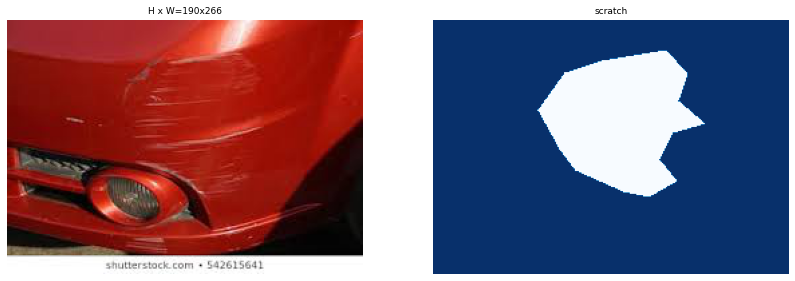

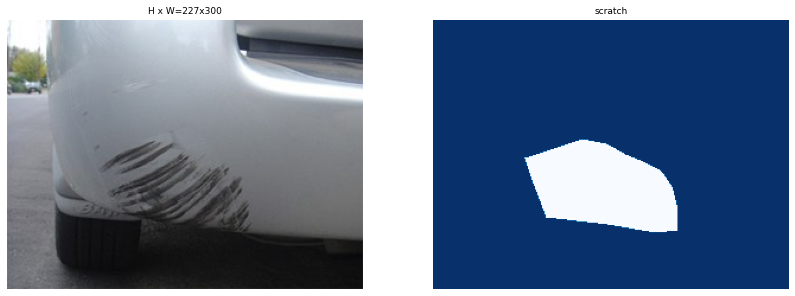

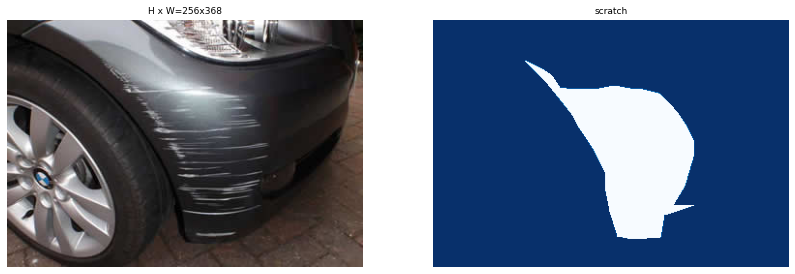

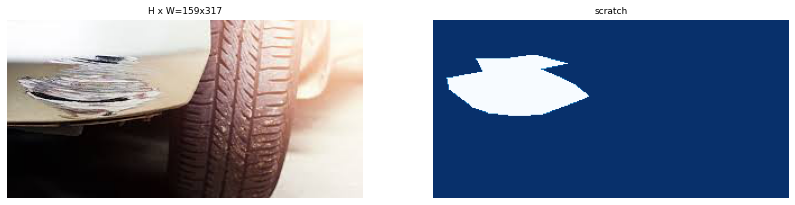

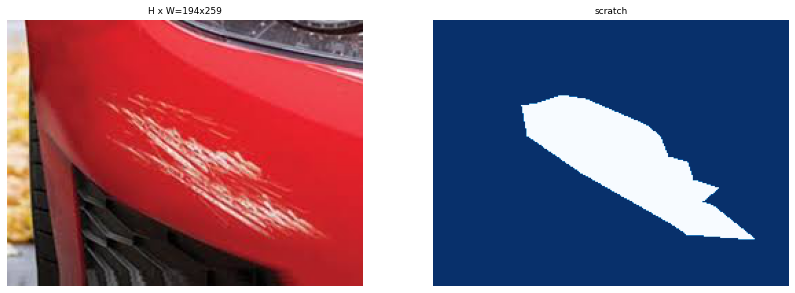

In [9]:
image_ids = np.random.choice(dataset.image_ids, 5)
for image_id in image_ids:
    image = dataset.load_image(image_id)
    mask, class_ids = dataset.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset.class_names, limit=1)

#### Create Bounding Box(BB)with annotated damage mask for a typical car image.

image_id  28 /home/pavlekecman/car-damage-detection-using-CNN/images/train/image31.jpg
image                    shape: (225, 225, 3)         min:    0.00000  max:  255.00000  uint8
mask                     shape: (225, 225, 1)         min:    0.00000  max:    1.00000  bool
class_ids                shape: (1,)                  min:    1.00000  max:    1.00000  int32
bbox                     shape: (1, 4)                min:    6.00000  max:  225.00000  int32


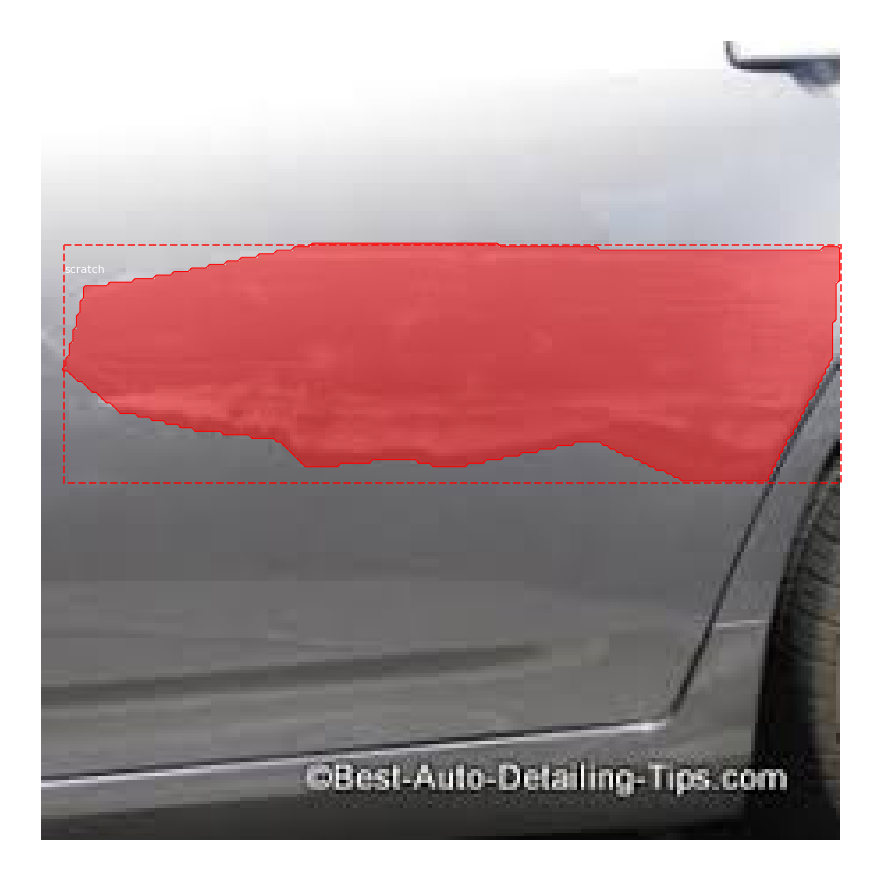

In [5]:
image_id = random.choice(dataset.image_ids)
image = dataset.load_image(image_id)
mask, class_ids = dataset.load_mask(image_id)
# Compute Bounding box
bbox = utils.extract_bboxes(mask)

# Display image and additional stats
print("image_id ", image_id, dataset.image_reference(image_id))
log("image", image)
log("mask", mask)
log("class_ids", class_ids)
log("bbox", bbox)
# Display image and instances
visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names)



#### Damage polygon coordinates

In [6]:
anno_json = json.load(open(os.path.join(DATA_PATH, "train/via_region_data.json"),encoding="utf8"))
annotations = list(anno_json.values()) 
annotations = [a for a in annotations if a['regions']]

annotations[1]['regions']['0']['shape_attributes']
l = []
for d in annotations[1]['regions']['0']['shape_attributes'].values():
    l.append(d)
display('x co-ordinates of the damage:',l[1])    
display('y co-ordinates of the damage:',l[2])


'x co-ordinates of the damage:'

[293, 360, 349, 308, 293]

'y co-ordinates of the damage:'

[303, 330, 314, 302, 303]